# Importing Necessary Libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings("ignore")

# Data Extraction

In [15]:
df=pd.read_csv('zomato_raw.txt')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# EDA

In [4]:
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [5]:
df.tail(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9541,5905215,Emirgan S�_ti��,208,��stanbul,"Emirgan Mahallesi, Sak۱p Sabanc۱ Caddesi, No 4...",Emirg�n,"Emirg�n, ��stanbul",29.056620,41.104969,"Restaurant Cafe, Turkish, Desserts",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,877
9542,5926979,Leman K�_lt�_r,208,��stanbul,"Cafera��a Mahallesi, Ne��et �_mer Sokak, No 9/...",Kad۱k�_y Merkez,"Kad۱k�_y Merkez, ��stanbul",29.022805,40.989705,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,3,3.7,Yellow,Good,506
9543,5916085,Dem Karak�_y,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, Hoca Ta...",Karak�_y,"Karak�_y, ��stanbul",28.978237,41.024633,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.5,Dark Green,Excellent,761
9544,5915547,Karak�_y G�_ll�_o��lu,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977636,41.022904,"Desserts, B�_rek",...,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1305
9545,5915054,Baltazar,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, K۱l۱�_ ...",Karak�_y,"Karak�_y, ��stanbul",28.981103,41.025785,"Burger, Izgara",...,Turkish Lira(TL),No,No,No,No,3,4.3,Green,Very Good,870
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [6]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
7956,18421471,Oven Fresh,1,New Delhi,"B 168, Jhilmil Colony, Vivek Vihar, New Delhi",Vivek Vihar,"Vivek Vihar, New Delhi",77.311922,28.669583,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
332,17500847,Natalia's,216,Macon,"201 North Macon St., Macon, GA 31210",Macon,"Macon, Macon",-83.787993,32.928495,"European, Italian, Mediterranean",...,Dollar($),No,No,No,No,4,4.2,Green,Very Good,379
8440,18228855,Fit Bites,1,Noida,"B-5, Ground Floor, Wave Silver Tower, Sector 1...",Sector 18,"Sector 18, Noida",77.325141,28.571014,Healthy Food,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.8,Yellow,Good,154
7931,8502,Bansal Mithai Wale,1,New Delhi,"7, B Block Market, Vivek Vihar, New Delhi",Vivek Vihar,"Vivek Vihar, New Delhi",77.318925,28.671308,Mithai,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,5
6720,300844,"34, Chowringhee Lane",1,New Delhi,"C8/354, Sector 8, Rohini, New Delhi",Rohini,"Rohini, New Delhi",77.129236,28.704980,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,3.3,Orange,Average,85


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [14]:
df.shape

(9551, 21)

# Removing Unnecessary Columns

In [57]:
df.drop(['Longitude','Latitude','Is delivering now','Rating color','Has Online delivery','Locality Verbose','Switch to order menu','Has Table booking','Country Code'],axis=1)

,Restaurant ID,Restaurant Name,City,Address,Locality,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),4,4.4,Very Good,270
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),4,4.9,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),4,4.8,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,Turkish,80,Turkish Lira(TL),3,4.1,Very Good,788
9547,5908749,Ceviz A��ac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),3,4.2,Very Good,1034
9548,5915807,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Italian, World Cuisine",170,Turkish Lira(TL),4,3.7,Good,661
9549,5916112,A���k Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,Restaurant Cafe,120,Turkish Lira(TL),4,4.0,Very Good,901


In [58]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [59]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

# Encoding Columns

In [60]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['Price Range', 'Average Cost for two', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())


# Lets Create Correaltion

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

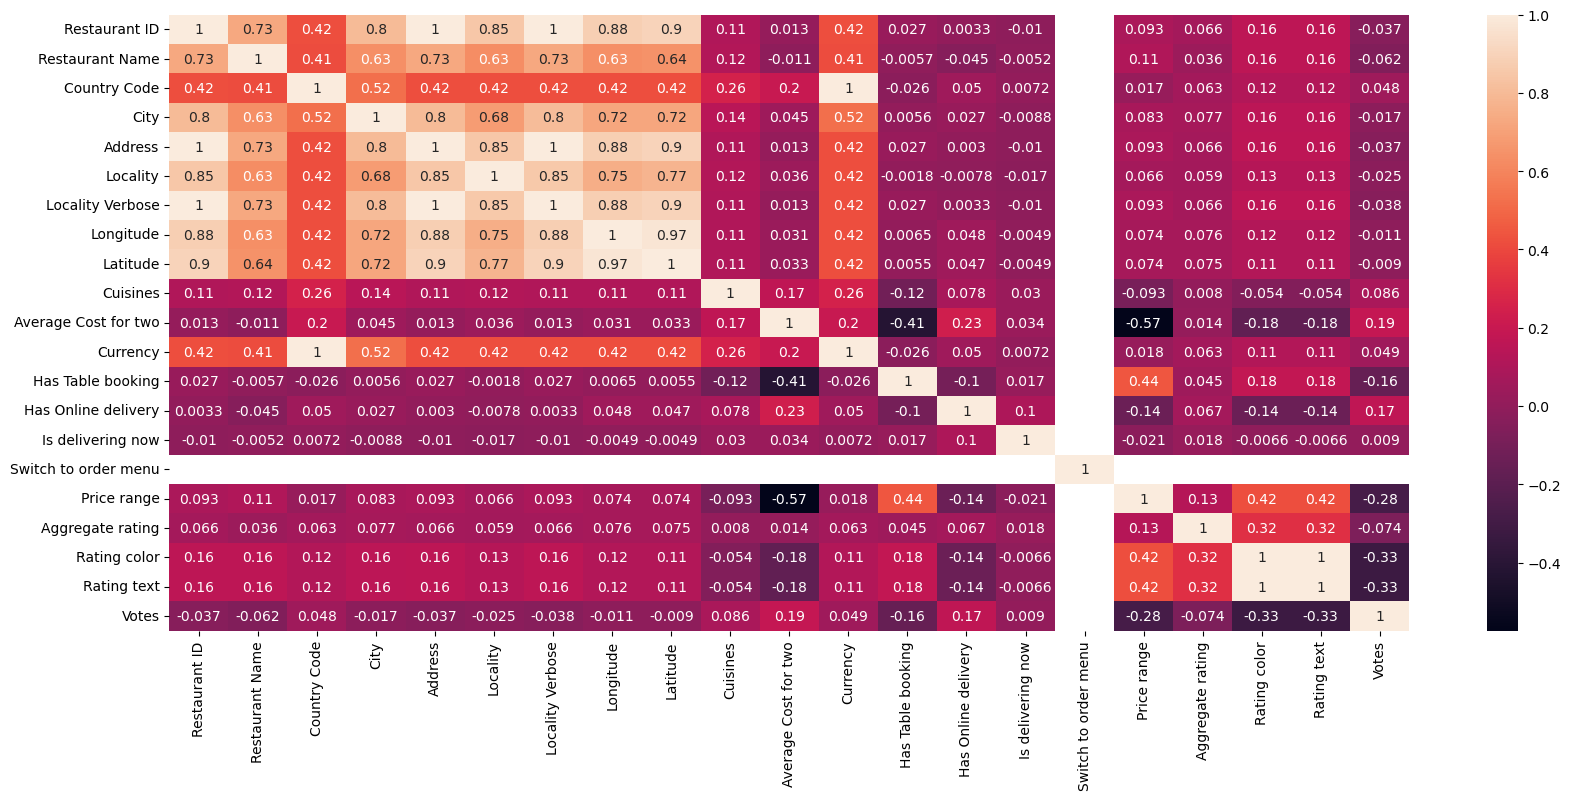

In [61]:
corr = df_en.corr(method='kendall')
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True)
df_en.columns

In [70]:
#Defining the independent variables and dependent variables
x = df_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = df_en['City']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

1352     92
8504    109
879      89
4243    108
5036    108
Name: City, dtype: int64

# Regression Analysis

In [80]:
#Prepare a Linear REgression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [81]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9999696237994395

# Data Visualization

Text(0.5, 1.0, 'Price range')

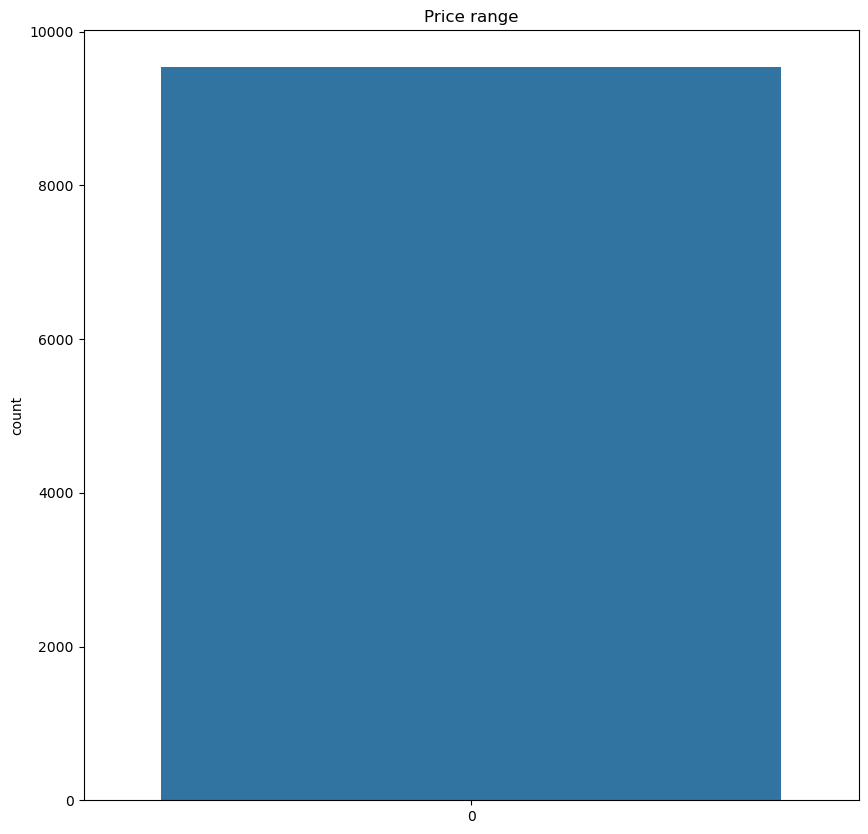

In [92]:
sns.countplot(df['Average Cost for two'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Price range')


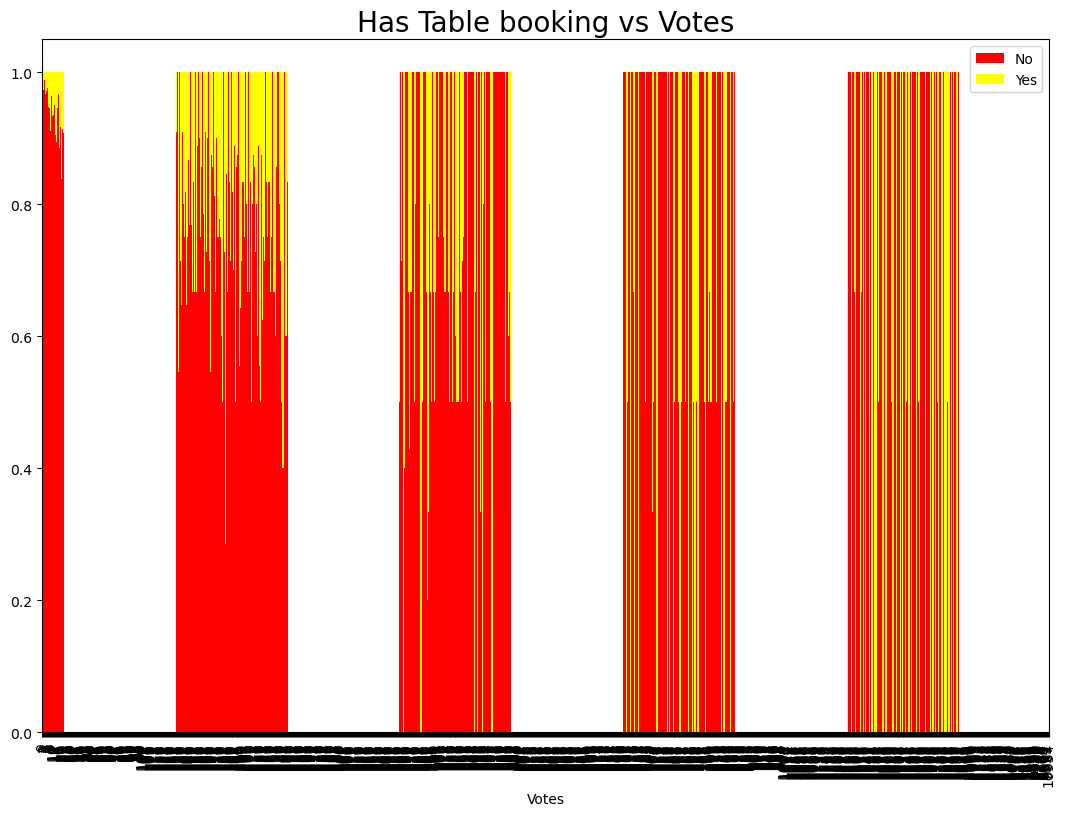

In [90]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df['Votes'], df['Has Table booking'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('Has Table booking vs Votes', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Currency')

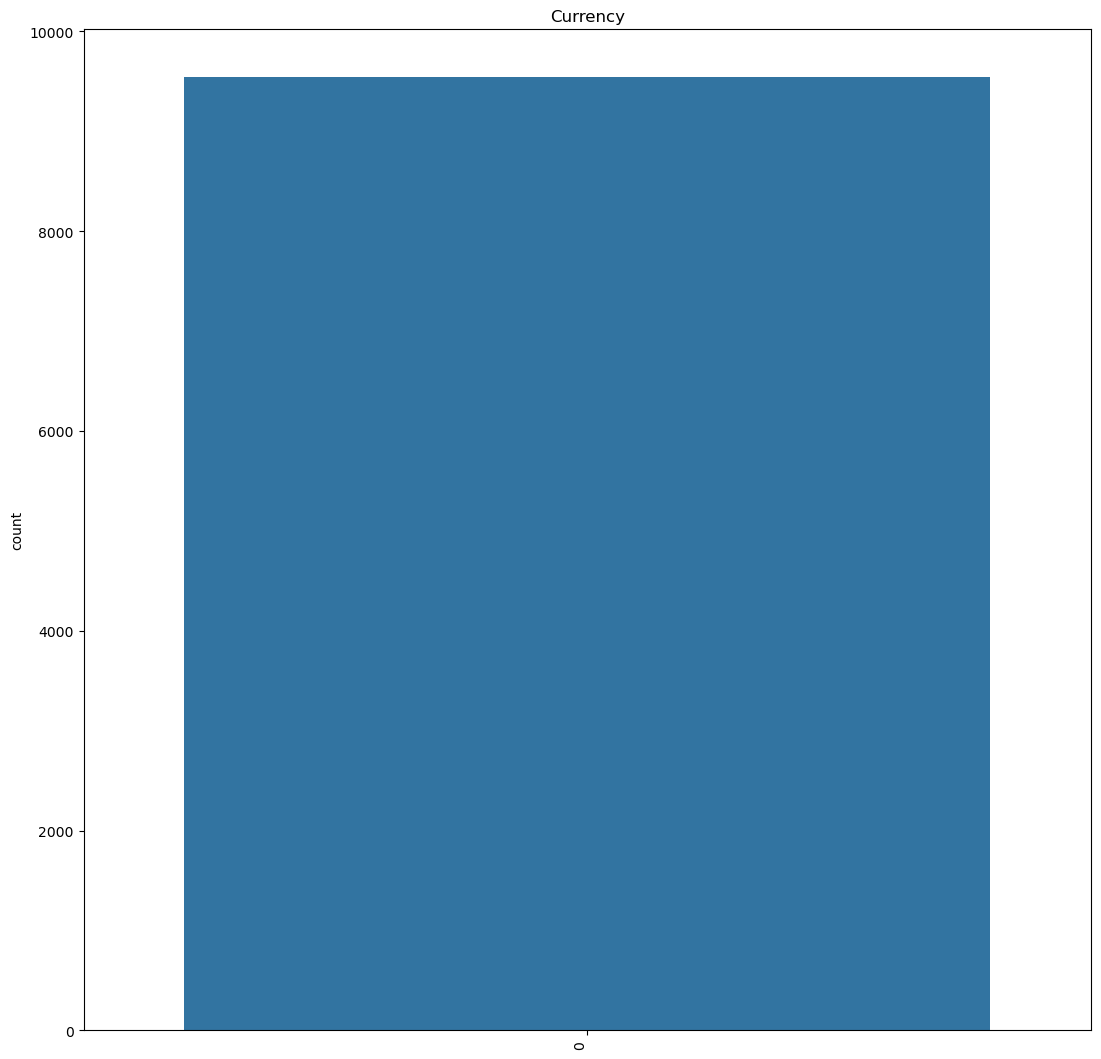

In [97]:
sns.countplot(df['Country Code'])
sns.countplot(df['Country Code']).set_xticklabels(sns.countplot(df['Country Code']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Currency')

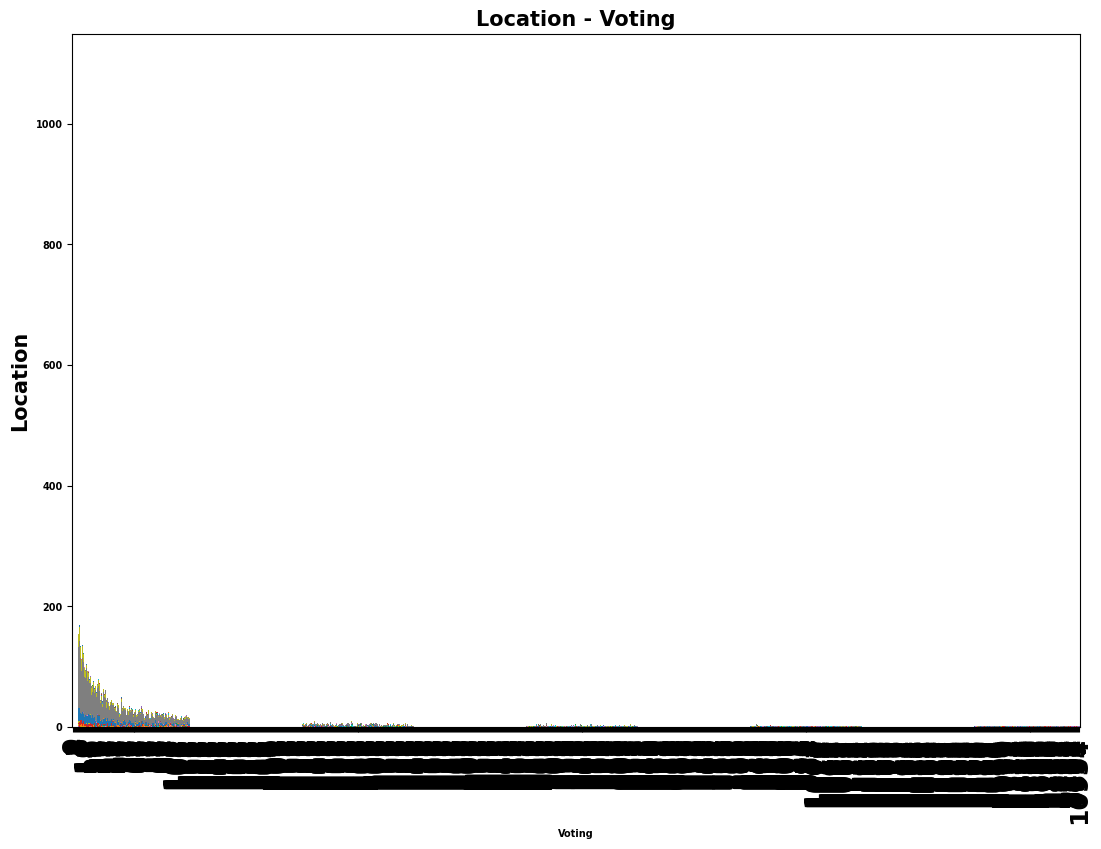

In [103]:
#Location and Rating
loc_plt=pd.crosstab(df['Votes'],df['City'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Voting',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=15,fontweight='bold')
plt.xlabel('Voting',fontsize=7,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.yticks(fontsize=7,fontweight='bold');
plt.legend().remove();

Text(0.5, 1.0, 'Costs')

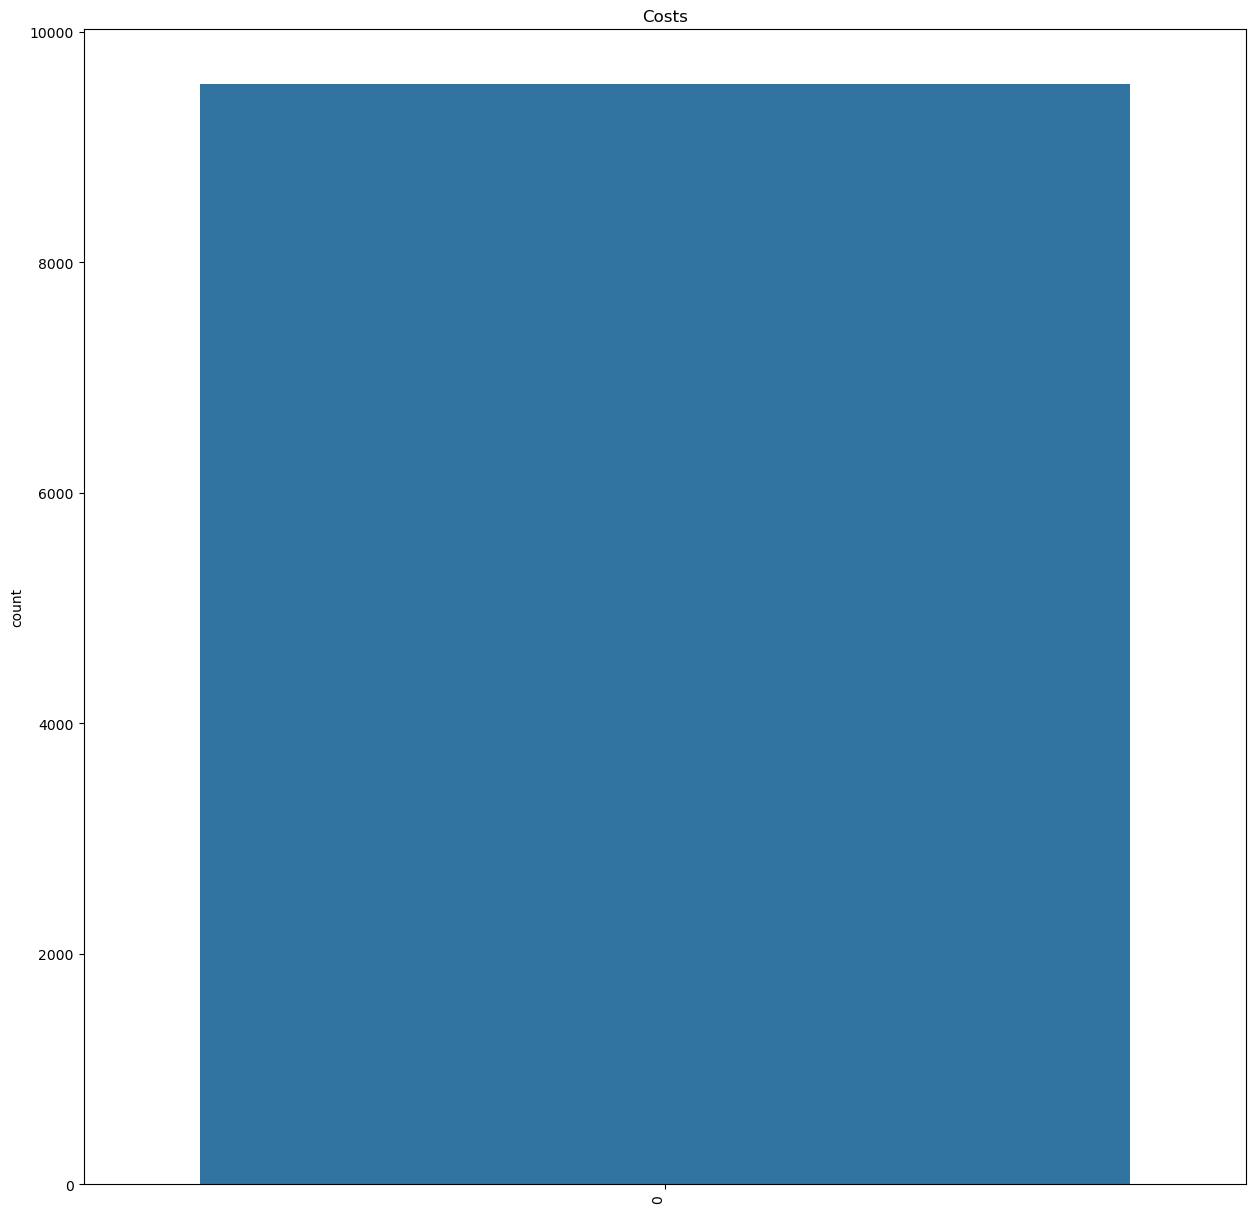

In [106]:

sns.countplot(df['Price range'])
sns.countplot(df['Price range']).set_xticklabels(sns.countplot(df['Price range']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Costs')


In [110]:
#Types of Services
sns.countplot(df['Currency'])
sns.countplot(df['Currency']).set_xticklabels(sns.countplot(df['Currency']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

ValueError: could not convert string to float: 'Botswana Pula(P)'

# Conclusion

Decision percentage approx 1 and graph is following the protocol of biased .sometimes failing in City and lots of columns and unable to predict the data accurately.
Heatmap follows the trend accuracy in Switch to order menu.